# Calculating the Intercept and Regression Coefficient using the Matrix Inverse in Python

### In linear regression, we map the predictor variable/s X to the dependent variable Y with the linear function Y = f(x) = a + bx

### You can think about this as solving a system of linear equations. For example, if we had an independent and dependent variable with n observations, we could write out the series of equations like this...

$y_{1} = a + b_{1}x_{1} \\
y_{2} = a + b_{1}x_{2} \\
... \\
y_{n-1} = a + b_{1}x_{n-1}\\
y_{n} = a + b_{1}x_{n}$


### We can change the representation of the linear system using matrix notation 
 #### Matrix equation: Ax = b where A is the matrix containing predictors, x is the matrix containing the coefficients, and b is the target/dependent variable. 

$
\begin{bmatrix}
1  & x_{1} \\
1 & x_{2} \\
... & ... \\
1 & x_{n-1}\\
1 & x_{n}
\end{bmatrix} 
$
$
\begin{bmatrix}
a\\
b_{1}
\end{bmatrix}
$
$
=
\begin{bmatrix}
y_{1} \\
y_{2} \\
... \\
y_{n-1} \\
y_{n}
\end{bmatrix} 
$


### We can solve for x (a and b) by performing the following operations
$(A^{T}A)^{-1}(A^{T}A)x = (A^{T}A)^{-1}A^{T}b$ or $x = (A^{T}A)^{-1}A^{T}b$


## Let's import some data and use Python to test some of what we discussed 

In [60]:
# Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [7]:
# Import synthetic dataset 
data = pd.read_csv("C:\\Users\\steve\\OneDrive\\Documents\\website projects\\statistics\\synthetic data\\simple_regression.csv")
#View dataframe
data.head()

,Unnamed: 0,x,y
0,1,4.373518,89.996377
1,2,4.723557,96.019228
2,3,5.671688,116.386921
3,4,4.860543,100.563548
4,5,4.797259,100.377688


Text(0, 0.5, 'y - Dependent Variable')

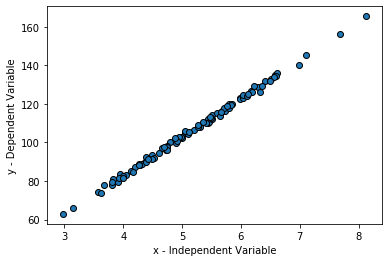

In [10]:
# Visualize data using matplotlib
plt.scatter(data.x, data.y, edgecolor = "black")
plt.xlabel("x - Independent Variable")
plt.ylabel("y - Dependent Variable")

##### Based on the above figure, we can see that there is a clear linear relationship between x and y (What a strange coincidence)

#### Note. The numpy library has a host of linear algerbra functions (numpy.linalg)

#### Creating the A and B matracies

In [39]:
#Create column of ones (This is for the intercept)
col1 = np.ones((data.shape[0], 1)) 
#Create a numpy array from the x variable in the above pandas data frame
col2 = np.array(data.x)
#Create A
A = np.column_stack((col1, col2))
#Create B
B = np.array(data.y)

#### Perform the above mentioned matrix operations

In [51]:
#Left multiply A by A transpose
AtA = np.transpose(A) @ A
# Perform the explicit inverse on AtA
AtAinv = np.linalg.inv(AtA)

### Before solving for x, let's do a quick sanity check to see if the inverse was calculated correctly.
#### Remember that 
$(A^{T}A)^{-1}(A^{T}A) = I$ Thus,
$(A^{T}A)^{-1}(A^{T}A)x = I x$

In [57]:
print(AtAinv @ AtA)

[[1. 0.]
 [0. 1.]]


#### Solving for x

In [68]:
x = AtAinv @ (np.transpose(A) @ B)
print("a = ", x[0])
print("b1 = ", x[1])

a =  3.2436220896970553
b1 =  19.9273221320193


#### Let's check our work by using sklearn

In [67]:
reg = LinearRegression().fit(A, B)
print("a = ", reg.intercept_)
print("b1 =", reg.coef_[1])

a =  3.2436220896965153
b1 = 19.927322132019434
